# Imports

In [44]:
import pandas as pd
from bicon import *
import gseapy


# Huntington disease

## 1. Data

## 1.1 Viewing the data
### 1.1.1 Gene expression

In [2]:
expr = pd.read_csv("data/huntington/expr.csv",index_col = 0)
expr.head()

,GSM86787,GSM86788,GSM86789,GSM86790,GSM86791,GSM86793,GSM86795,GSM86796,GSM86798,GSM86799,...,GSM86840,GSM86841,GSM86842,GSM86843,GSM86846,GSM86848,GSM86849,GSM86851,GSM86852,GSM86854
10,33.112974,33.703395,37.224553,52.881787,54.203425,11.930469,19.542797,4.963098,16.850246,11.488427,...,28.364223,10.893349,32.003227,33.357152,33.751182,16.337292,8.898073,41.463045,16.083948,23.459615
100,16.808040,55.184256,31.533622,49.815342,43.077750,22.306542,37.107761,37.908687,32.867578,38.067536,...,75.573411,48.193749,52.958310,56.978099,50.336053,68.932736,46.057752,50.841999,36.249842,43.204155
1000,116.986045,182.102736,106.150636,151.535494,119.242570,106.448666,83.082678,77.382204,119.632474,132.817007,...,86.725452,85.827653,113.521285,85.994104,137.509197,126.409487,77.605193,122.306059,76.458094,119.715459
10000,109.509458,177.849417,122.884051,150.876973,132.808171,127.974835,85.850004,87.309120,94.443569,136.730622,...,147.248619,153.492774,176.453783,157.784101,123.757122,169.986703,137.683577,137.729257,126.564969,128.489661
10001,33.305921,25.601419,23.229452,23.607638,20.513866,34.361974,36.670191,14.515346,22.735549,22.579141,...,21.879783,32.738971,27.933580,23.994980,29.287835,26.104369,11.390439,27.103843,22.765788,16.843519


### 1.1.2 PPI

In [14]:
ppi = pd.read_csv("data/biogrid.human.entrez.tsv", sep = "\t", header = None)
ppi.head()

,0,1
0,6416,2318
1,6416,5371
2,6416,351
3,6416,409
4,6416,5932


# 1.2 Preprocessing:
### BiCoN preprocessing module by default takes care of data normalization, log2 transformation and reduction to the most variable genes

In [3]:
path_expr,path_net ='data/huntington/expr.csv', 'data/biogrid.human.entrez.tsv'
GE,G,labels, _= data_preprocessing(path_expr, path_net)


### If your data is already zscored set zscores=False.
### If you don't need log2 transformation set log2=False.


## 2. Running the algorithm

### 2.1 Setting solution minimal and maximal size

In [4]:
L_g_min = 10
L_g_max = 15

### 2.2 Running the search (takes 2-3 minutes)

In [5]:
model = BiCoN(GE,G,L_g_min,L_g_max)
solution,scores= model.run_search(max_iter = 50, verbose = False)

CPU times: user 51 µs, sys: 35 µs, total: 86 µs
Wall time: 26.7 µs


100%|██████████| 20/20 [00:03<00:00,  5.79it/s]


## 3. Results analysis

### 3.1 Creating the object for results analysis

In [6]:
results = results_analysis(solution, labels, convert = True, origID = 'entrezgene')
# convert = True - to convert to gene names
# origID = 'entrezgene' - the original gene id

### 3.2 Network visualization

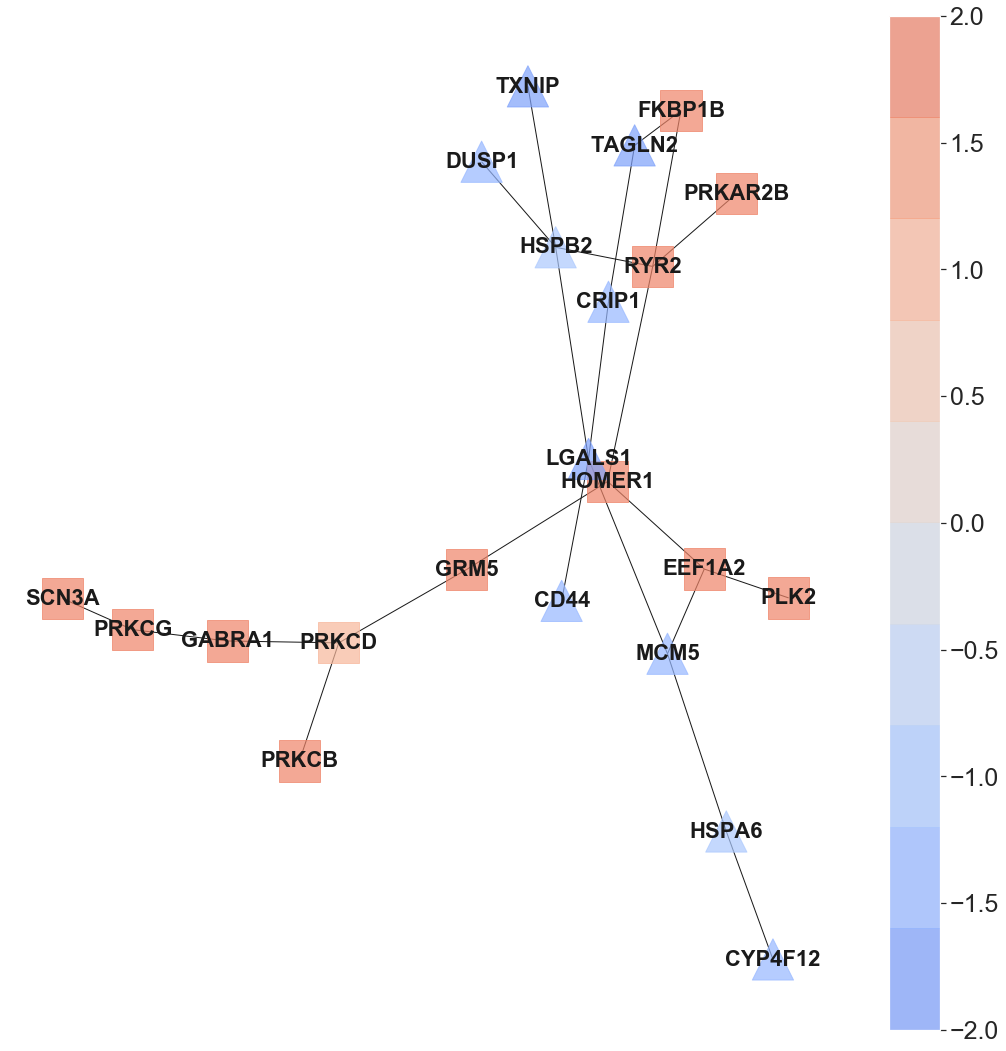

In [9]:
results.show_networks(GE, G)


### 3.2 Biclustering visualization

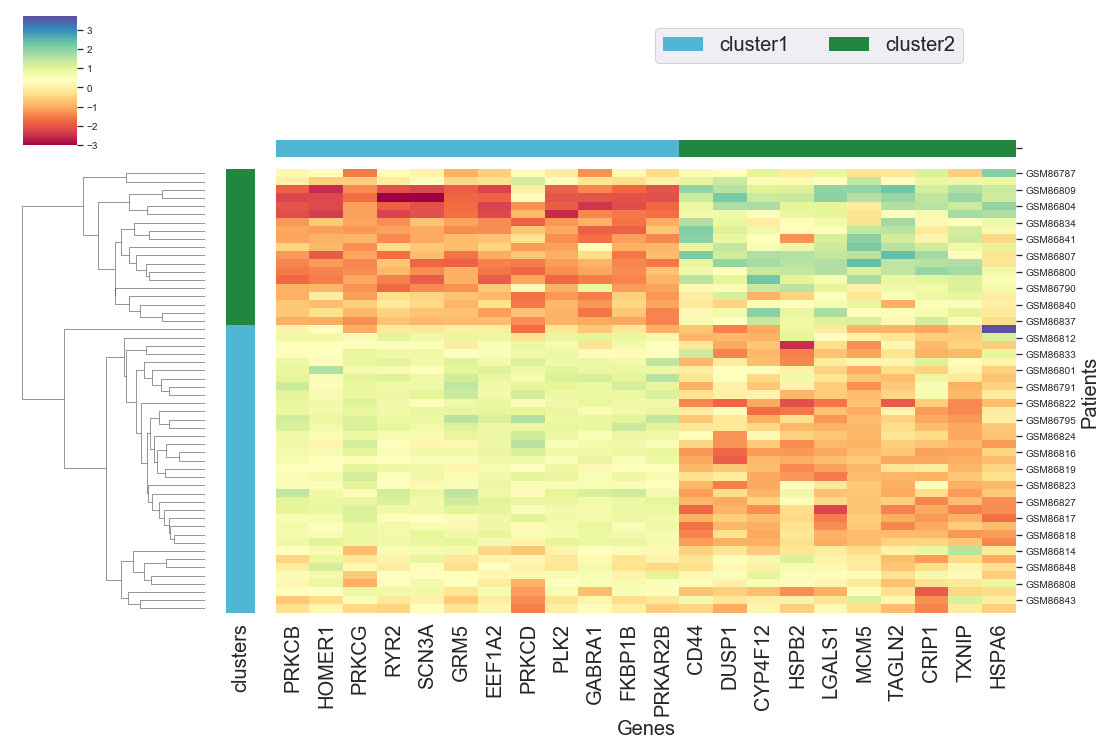

In [40]:
results.show_clustermap(GE, G)

### To access patients/genes biclusters run:
```{python}
print(results.patients1)
print(results.patients1)
print(results.genes1)
print(results.genes2)
```
#### Example: print patients IDs in the first bicluster:

In [15]:
print(results.patients1)

['GSM86789', 'GSM86791', 'GSM86793', 'GSM86795', 'GSM86796', 'GSM86798', 'GSM86801', 'GSM86802', 'GSM86803', 'GSM86808', 'GSM86812', 'GSM86814', 'GSM86816', 'GSM86817', 'GSM86818', 'GSM86819', 'GSM86820', 'GSM86821', 'GSM86822', 'GSM86823', 'GSM86824', 'GSM86825', 'GSM86826', 'GSM86827', 'GSM86828', 'GSM86829', 'GSM86830', 'GSM86831', 'GSM86832', 'GSM86833', 'GSM86842', 'GSM86843', 'GSM86848', 'GSM86849', 'GSM86852']


### 3.3 Quality control with the ground truth
#### load IDs of patients that have Huntington and Controls

In [26]:
ht_ids = pd.read_csv("data/huntington/true_HT.txt", sep = "\t", header = None)[0].tolist()
ht_ids

['GSM86788',
 'GSM86790',
 'GSM86800',
 'GSM86804',
 'GSM86806',
 'GSM86807',
 'GSM86809',
 'GSM86810',
 'GSM86811',
 'GSM86815',
 'GSM86834',
 'GSM86837',
 'GSM86840',
 'GSM86841',
 'GSM86842',
 'GSM86843',
 'GSM86846',
 'GSM86848',
 'GSM86849',
 'GSM86851',
 'GSM86852',
 'GSM86854']

In [27]:
control_ids = pd.read_csv("data/huntington/true_control.txt", sep = "\t", header = None)[0].tolist()
control_ids

['GSM86787',
 'GSM86789',
 'GSM86791',
 'GSM86793',
 'GSM86795',
 'GSM86796',
 'GSM86798',
 'GSM86799',
 'GSM86801',
 'GSM86802',
 'GSM86803',
 'GSM86808',
 'GSM86812',
 'GSM86814',
 'GSM86816',
 'GSM86817',
 'GSM86818',
 'GSM86819',
 'GSM86820',
 'GSM86821',
 'GSM86822',
 'GSM86823',
 'GSM86824',
 'GSM86825',
 'GSM86826',
 'GSM86827',
 'GSM86828',
 'GSM86829',
 'GSM86830',
 'GSM86831',
 'GSM86832',
 'GSM86833']

### 3.4 Clustermap with known labels

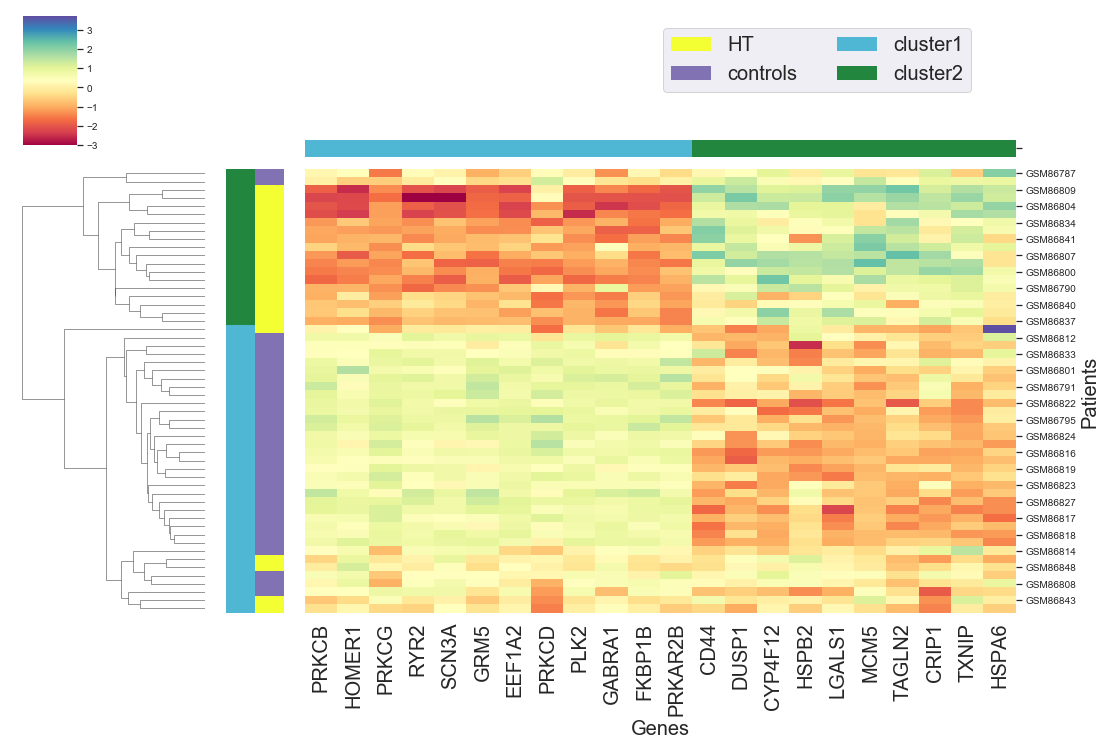

In [42]:
true_classes = [ht_ids,control_ids]
results.show_clustermap(GE, G, true_labels = true_classes,class_names = ["HT", "controls"])


### 3.4 Evaluate overlap between the real patient phenotype and the clusters


In [43]:
results.jaccard_index(true_labels = true_classes)


Jaccard indices for two groups are 0.81 and 0.71


(0.81, 0.71)

### 3.5 Enrichment analysis with gseapy
#### 3.5.6 Check all available libraries 

In [45]:
gseapy.get_library_name()


['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'DisGeNET',
 'Disease_Perturbations_from_GEO_down',
 'Disease_Perturbati